In [1]:
#STEP1 Visualize Data

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df=pd.read_csv('ev.csv')
df

,Month,Sales
0,Jan-17,189570
1,Feb-17,221757
2,Mar-17,319922
3,Apr-17,210293
4,May-17,244534
5,Jun-17,280853
6,Jul-17,254255
7,Aug-17,244351
8,Sep-17,316447
9,Oct-17,264150


<AxesSubplot:>

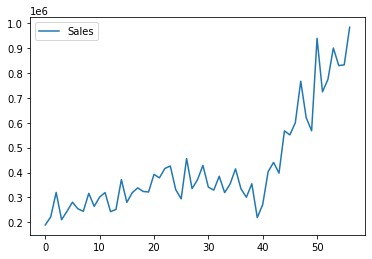

In [5]:
df.plot()  # plot ev sales

In [7]:
#STEP 2 Stationarity test
from statsmodels.tsa.stattools import adfuller

d:\Users\JasonChow\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [10]:
test_result=adfuller(df['Sales'])
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [11]:
adfuller_test(df['Sales']) 

ADF Test Statistic : 0.7071925486951873
p-value : 0.9899803215641829
#Lags Used : 11
Number of Observations Used : 45
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [12]:
# STEP3 Data is not stable, differential processing

In [136]:
df['Seasonal First Difference'] = df['Sales'] - df['Sales'].shift(1)
df['Seasonal First Difference'] 

0          NaN
1      32187.0
2      98165.0
3    -109629.0
4      34241.0
5      36319.0
6     -26598.0
7      -9904.0
8      72096.0
9     -52297.0
10     37166.0
11     18132.0
12    -76563.0
13      8806.0
14    120147.0
15    -91779.0
16     38908.0
17     19351.0
18    -14287.0
19     -2298.0
20     70823.0
21    -13939.0
22     37603.0
23     10052.0
24    -95041.0
25    -36899.0
26    161951.0
27   -121021.0
28     35654.0
29     57686.0
30    -87250.0
31    -12107.0
32     55701.0
33    -65562.0
34     34435.0
35     60799.0
36    -80117.0
37    -33717.0
38     54030.0
39   -135793.0
40     52217.0
41    132249.0
42     37118.0
43    -42971.0
44    169625.0
45    -16151.0
46     48748.0
47    166869.0
48   -145984.0
49    -53217.0
50    371538.0
51   -214870.0
52     49627.0
53    126238.0
54    -70502.0
55      2778.0
56    151176.0
Name: Seasonal First Difference, dtype: float64

<AxesSubplot:>

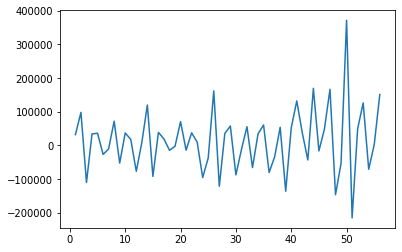

In [137]:
df['Seasonal First Difference'].plot()

In [138]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -1.4129993512476908
p-value : 0.5760284439278107
#Lags Used : 11
Number of Observations Used : 44
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [145]:
df['Seasonal Second Difference'] = df['Seasonal First Difference'] - df['Seasonal First Difference'].shift(4)
df['Seasonal Second Difference']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5       4132.0
6    -124763.0
7      99725.0
8      37855.0
9     -88616.0
10     63764.0
11     28036.0
12   -148659.0
13     61103.0
14     82981.0
15   -109911.0
16    115471.0
17     10545.0
18   -134434.0
19     89481.0
20     31915.0
21    -33290.0
22     51890.0
23     12350.0
24   -165864.0
25    -22960.0
26    124348.0
27   -131073.0
28    130695.0
29     94585.0
30   -249201.0
31    108914.0
32     20047.0
33   -123248.0
34    121685.0
35     72906.0
36   -135818.0
37     31845.0
38     19595.0
39   -196592.0
40    132334.0
41    165966.0
42    -16912.0
43     92822.0
44    117408.0
45   -148400.0
46     11630.0
47    209840.0
48   -315609.0
49    -37066.0
50    322790.0
51   -381739.0
52    195611.0
53    179455.0
54   -442040.0
55    217648.0
56    101549.0
Name: Seasonal Second Difference, dtype: float64

<AxesSubplot:>

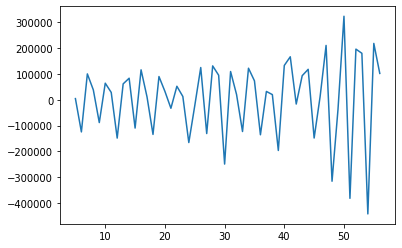

In [146]:
df['Seasonal Second Difference'].plot()

In [147]:
adfuller_test(df['Seasonal Second Difference'].dropna())

ADF Test Statistic : -3.413724138149066
p-value : 0.010499819692897627
#Lags Used : 7
Number of Observations Used : 44
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [66]:
#Auto Regressive Model  

d:\Users\JasonChow\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:411: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


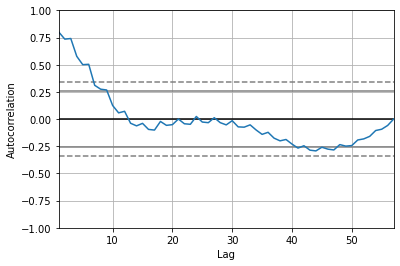

In [111]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

In [112]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

d:\Users\JasonChow\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


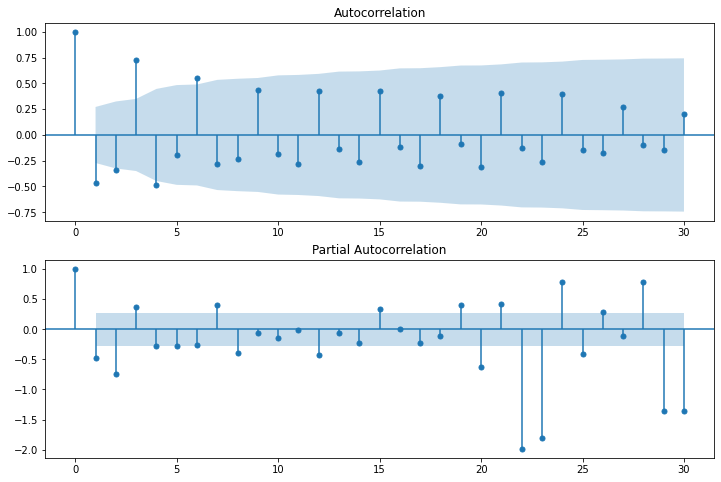

In [149]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal Second Difference'].iloc[5:],lags=30,ax=ax1)
ax1.xaxis.set_ticks_position('bottom')

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal Second Difference'].iloc[5:],lags=30,ax=ax2)

In [85]:
# For non-seasonal data, from ACF and PCF figure， it can be concluded that p,d,q
#p=4, d=2, q=5
from statsmodels.tsa.arima_model import ARIMA

In [251]:
model=ARIMA(df['Sales'].dropna(),order=(4,2,1))
model_fit=model.fit()

In [252]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.Sales   No. Observations:                   55
Model:                 ARIMA(4, 2, 1)   Log Likelihood                -688.611
Method:                       css-mle   S.D. of innovations          62538.412
Date:                Tue, 02 Nov 2021   AIC                           1391.221
Time:                        22:50:08   BIC                           1405.273
Sample:                             2   HQIC                          1396.655
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            586.5973    351.262      1.670      0.101    -101.864    1275.058
ar.L1.D2.Sales    -0.6117      0.135     -4.515      0.000      -0.877      -0.346
ar.L2.D2.Sales    -0.3631      0.157     -2.320      0.025      -0.670      -0.056
ar.L3.D2.Sales     0.3585      0.158      2.274      0.027       0.050       0.668
ar.L4.D2.Sales     0.1616      0.135      1.194      0.238      -0.104       0.427
ma.L1.D2.Sales    -1.0000      0.064    -15.583      0.000      -1.126      -0.874
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.5486           -0.9976j            1.1385           -0.3300
AR.2           -0.5486           +0.9976j            1.1385            0.3300
AR.3            1.6950           -0.0000j            1.6950           -0.0000
AR.4           -2.8158           -0.0000j            2.8158           -0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [253]:
pred = model_fit.predict(start = 56, end = 68, dynamic= True, typ='levels')
pred

d:\Users\JasonChow\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:293: FutureWarning: RangeIndex._start is deprecated and will be removed in a future version. Use RangeIndex.start instead
  stop = base_index._start + (key + 1) * base_index._step
d:\Users\JasonChow\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:293: FutureWarning: RangeIndex._step is deprecated and will be removed in a future version. Use RangeIndex.step instead
  stop = base_index._start + (key + 1) * base_index._step
d:\Users\JasonChow\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:294: FutureWarning: RangeIndex._start is deprecated and will be removed in a future version. Use RangeIndex.start instead
  index = RangeIndex(start=base_index._start,
d:\Users\JasonChow\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:296: FutureWarning: RangeIndex._step is deprecated and will be removed in a future version. Use RangeIndex.step instead
  step=base_index._step)


56    948216.045534
57    793420.164404
58    841347.301128
59    922492.498134
60    819538.037590
61    846060.222004
62    904919.120793
63    836341.835401
64    850634.918687
65    893039.561208
66    847691.025403
67    854923.244614
68    885335.111341
dtype: float64

<AxesSubplot:>

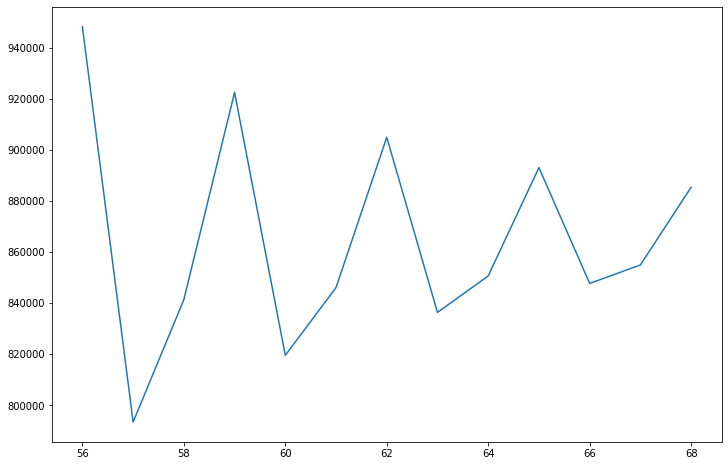

In [254]:
pred.plot(figsize=(12,8))